# Exploration of the Ford GoBike System Data
## by (Dmitrij Burlak)



## Preliminary Wrangling
Is done in the notebook DownloadAndCleanData

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [41]:
%%time
rides_all = pd.read_csv('data/rides.csv', index_col=False);
rides = rides_all.copy()

Wall time: 8.09 s


### What is the structure of your dataset?
There are 1430683 rides in the dataset with 17 anonymized features 
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Member Year of Birth
- Member Gender
- User Age

Most variables are numeric in nature, but the variables member_gender and bike_share_for_all_trip are nominal variables.
The ordinal variable user_type is ordered with the following levels:
User Type: Customer -> Subscriber

### What is/are the main feature(s) of interest in your dataset?



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

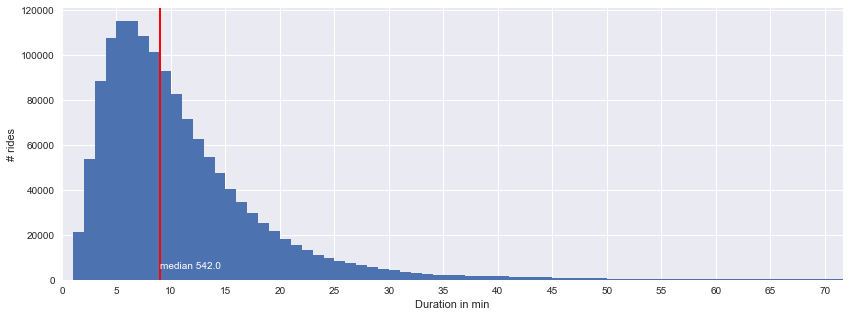

In [120]:
# start with a standard hist plot of ride duration
binsize = 60
bins = np.arange(0, rides['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[14, 5])
plt.hist(data = rides, x = 'duration_sec', bins = bins)
plt.xlabel('Duration in min')
xticks = np.arange(0,4000+300, 300)
xticksl= [int(x/60) for x in xticks]
plt.xticks(xticks,xticksl)
plt.xlim(0,4300)
plt.ylabel('# rides')
plt.axvline(rides.duration_sec.median(), color='r')
median=rides.duration_sec.median()
plt.axvline(median, color='r')
plt.text(x=median, y=5e3, s='median: {}'.format(median), color='w')
plt.show()

The series seems to be strongly right skewed so I'll check for a useful cutoff with percentils.

In [71]:
# duration is strongly right skewed
rides.duration_sec.quantile([.01,.25,.5,.75,.99])

0.01     106.00
0.25     345.00
0.50     542.00
0.75     837.00
0.99    3767.18
Name: duration_sec, dtype: float64

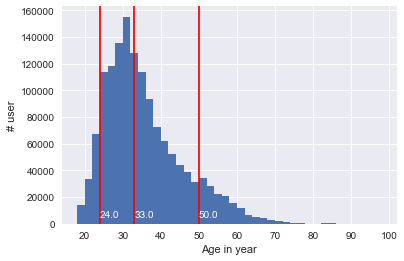

In [121]:
# another hist of age with 10% 50% and 75% quantiles 
bins = np.arange(18,100, 2)
plt.hist(data= rides, x='user_age', bins=bins);
plt.xlabel('Age in year')
plt.ylabel('# user');
quantiles = rides.user_age.quantile([0.1,0.5,0.9])
for q in quantiles.values:
    plt.axvline(q, color = 'r')
    plt.text(x=q, y = 5e3, s = q, color='w')

Around 50 year there seems to be another peek. In order to analyse this observation I'll look more in detail into a violinplot.

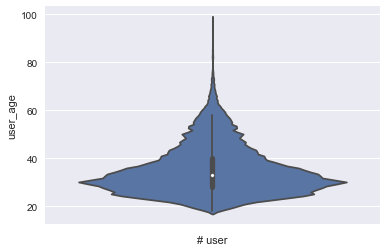

In [126]:
sns.violinplot(data = rides, y = 'user_age');
plt.xlabel('# user');

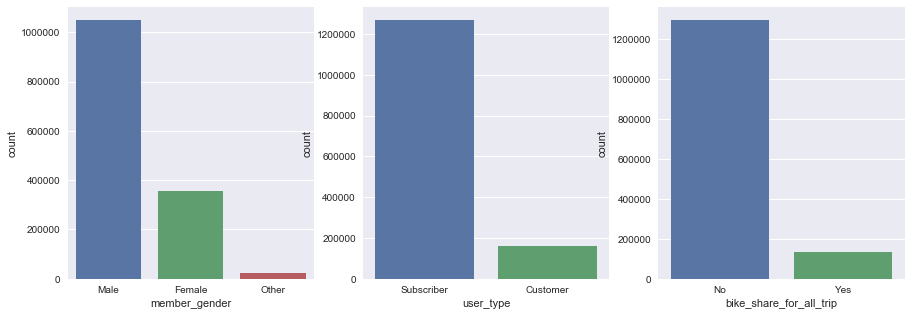

In [79]:
# Look into the categorical variables
plt.figure(figsize = [15,5])

plt.subplot(1, 3,1)
sns.countplot(data=rides, x = 'member_gender');

plt.subplot(1,3,2)
sns.countplot(data=rides, x = 'user_type');

plt.subplot(1,3,3)
sns.countplot(data=rides, x = 'bike_share_for_all_trip');


Most common user seems to be a male subscriber without sharing the bike for all trip

In [64]:
rides

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,user_age
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No,32
1,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No,22
2,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No,27
3,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988.0,Male,No,30
4,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81,Berry St at 4th St,37.775880,-122.393170,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980.0,Male,No,38
5,996,2018-01-31 23:34:56.004,2018-01-31 23:51:32.674,134,Valencia St at 24th St,37.752428,-122.420628,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,1987.0,Male,Yes,31
6,825,2018-01-31 23:34:14.027,2018-01-31 23:47:59.809,305,Ryland Park,37.342725,-121.895617,317,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,1994.0,Female,Yes,24
7,432,2018-01-31 23:34:26.484,2018-01-31 23:41:39.297,89,Division St at Potrero Ave,37.769218,-122.407646,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,2928,Subscriber,1993.0,Male,No,25
8,601,2018-01-31 23:29:46.832,2018-01-31 23:39:48.000,223,16th St Mission BART Station 2,37.764765,-122.420091,86,Market St at Dolores St,37.769305,-122.426826,3016,Subscriber,1957.0,Male,No,61
9,887,2018-01-31 23:24:16.357,2018-01-31 23:39:04.123,308,San Pedro Square,37.336802,-121.894090,297,Locust St at Grant St,37.322980,-121.887931,55,Subscriber,1976.0,Female,Yes,42


> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [ ]:
rides.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!